# Függőségek

In [135]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import seaborn
seaborn.set(style='ticks')

# az audio filok megjelenítéséhez szükséges
from IPython.display import Audio

# must be
import scipy

from pathlib import Path


In [136]:
!ls

!rm -rf ./hangoskonyv/benedek
!rm -rf ./hangoskonyv/noimese


!mkdir hangoskonyv/benedek
!mkdir hangoskonyv/noimese

!cp hangoskonyv/benedek_elek.mp3 hangoskonyv/benedek
!cp hangoskonyv/noi_mesemondo.mp3 hangoskonyv/noimese


hangoskonyv  version5.ipynb


In [137]:



file = Path("/hangoskonyv/benedek/benedek_elek.wav")
if file.is_file():
    !rm ./hangoskonyv/benedek/benedek_elek.wav

file = Path("/hangoskonyv/noimese/noi_mesemondo.wav")
if file.is_file():
    !rm ./hangoskonyv/noimese/noi_mesemondo.wav



In [138]:


!ffmpeg -i hangoskonyv/benedek/benedek_elek.mp3 -acodec pcm_s16le -ar 22050 hangoskonyv/benedek/benedek_elek.wav

!ffmpeg -i hangoskonyv/noimese/noi_mesemondo.mp3 -acodec pcm_s16le -ar 22050 hangoskonyv/noimese/noi_mesemondo.wav



ffmpeg version 4.1.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/sparkuser/anaconda3 --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1553596139084/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 22.100 / 56. 22.100
  libavcodec     58. 35.100 / 58. 35.100
  libavformat    58. 20.100 / 58. 20.100
  libavdevice    58.  5.100 / 58.  5.100
  libavfilter     7. 40.101 /  7. 40.101
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  3.100 /  5.  3.100
  libswresample   3.  3.100 /  3.  3.100
  libpostproc    55.  3.100 / 55.  3.100
[mp3 @ 0x56067e7aaa00] Estimating duration from bitrate, this

In [139]:


!ffmpeg -i hangoskonyv/benedek/benedek_elek.wav -f segment -segment_time 3 -c copy hangoskonyv/benedek/be%03d.wav

!ffmpeg -i hangoskonyv/noimese/noi_mesemondo.wav -f segment -segment_time 3 -c copy hangoskonyv/noimese/no%03d.wav



ffmpeg version 4.1.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/sparkuser/anaconda3 --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1553596139084/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 22.100 / 56. 22.100
  libavcodec     58. 35.100 / 58. 35.100
  libavformat    58. 20.100 / 58. 20.100
  libavdevice    58.  5.100 / 58.  5.100
  libavfilter     7. 40.101 /  7. 40.101
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  3.100 /  5.  3.100
  libswresample   3.  3.100 /  3.  3.100
  libpostproc    55.  3.100 / 55.  3.100
Guessed Channel Layout for Input Stream #0.0 : stereo
Input #

[segment @ 0x564962dc5680] Opening 'hangoskonyv/benedek/be103.wav' for writing
[segment @ 0x564962dc5680] Opening 'hangoskonyv/benedek/be104.wav' for writing
[segment @ 0x564962dc5680] Opening 'hangoskonyv/benedek/be105.wav' for writing
[segment @ 0x564962dc5680] Opening 'hangoskonyv/benedek/be106.wav' for writing
[segment @ 0x564962dc5680] Opening 'hangoskonyv/benedek/be107.wav' for writing
[segment @ 0x564962dc5680] Opening 'hangoskonyv/benedek/be108.wav' for writing
[segment @ 0x564962dc5680] Opening 'hangoskonyv/benedek/be109.wav' for writing
[segment @ 0x564962dc5680] Opening 'hangoskonyv/benedek/be110.wav' for writing
[segment @ 0x564962dc5680] Opening 'hangoskonyv/benedek/be111.wav' for writing
[segment @ 0x564962dc5680] Opening 'hangoskonyv/benedek/be112.wav' for writing
[segment @ 0x564962dc5680] Opening 'hangoskonyv/benedek/be113.wav' for writing
[segment @ 0x564962dc5680] Opening 'hangoskonyv/benedek/be114.wav' for writing
[segment @ 0x564962dc5680] Opening 'hangoskonyv/bene

[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no043.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no044.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no045.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no046.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no047.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no048.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no049.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no050.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no051.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no052.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no053.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no054.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noim

[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no148.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no149.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no150.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no151.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no152.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no153.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no154.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no155.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no156.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no157.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no158.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no159.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noim

[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no250.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no251.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no252.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no253.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no254.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no255.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no256.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no257.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no258.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no259.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no260.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no261.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noim

[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no355.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no356.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no357.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no358.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no359.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no360.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no361.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no362.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no363.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no364.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no365.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no366.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noim

[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no457.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no458.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no459.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no460.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no461.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no462.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no463.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no464.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no465.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no466.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no467.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no468.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noim

[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no559.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no560.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no561.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no562.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no563.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no564.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no565.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no566.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no567.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no568.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no569.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no570.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noim

[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no663.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no664.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no665.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no666.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no667.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no668.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no669.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no670.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no671.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no672.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no673.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no674.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noim

[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no766.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no767.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no768.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no769.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no770.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no771.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no772.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no773.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no774.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no775.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no776.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no777.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noim

[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no868.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no869.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no870.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no871.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no872.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no873.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no874.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no875.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no876.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no877.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no878.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no879.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noim

[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no971.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no972.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no973.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no974.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no975.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no976.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no977.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no978.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no979.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no980.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no981.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noimese/no982.wav' for writing
[segment @ 0x55fbdc571fc0] Opening 'hangoskonyv/noim

In [140]:
%matplotlib inline

In [141]:
# Benedek hangminta
y, sr = librosa.load('hangoskonyv/benedek/be051.wav', duration=2.97)

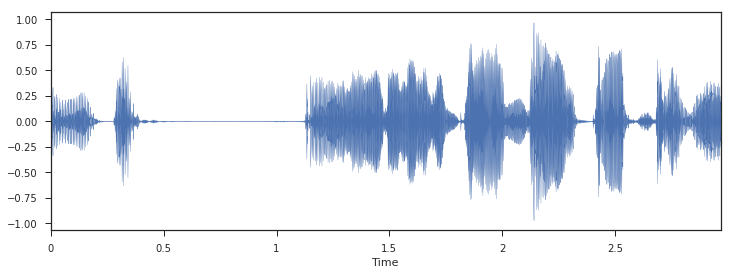

In [142]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(y, sr)

In [143]:
Audio(data = y, rate = sr)

In [144]:
ps = librosa.feature.melspectrogram(y=y, sr=sr,power=1.0)
ps.shape

(128, 128)

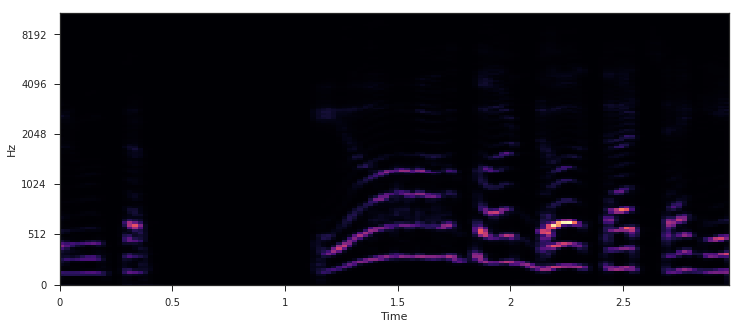

In [145]:
plt.figure(figsize=(12,5))

librosa.display.specshow(ps, sr=sr, hop_length=512, y_axis='mel', x_axis='time')

# Adatok beolvasása

In [146]:
data = pd.read_csv('hangoskonyv/metadata/Hangoskonyv.csv')
# data.head(120)

In [147]:
data.shape

(200, 8)

In [148]:
# csak a 3 másodpercnél hosszabakat kérjük
# valid_data = data[['slice_file_name', 'fold' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]

valid_data = data
valid_data.shape

(200, 8)

In [149]:
type(valid_data)

pandas.core.frame.DataFrame

In [150]:
valid_data.columns

Index(['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold',
       'classID', 'class'],
      dtype='object')

In [151]:
# valid_data.take

# Spectrum analízis és annak változatai

## Short time fourier transform 

In [152]:
# Benedek hangminta
y, sr = librosa.load('hangoskonyv/benedek/be051.wav', duration=2.97)

# Short time fourier transform
d = np.abs(librosa.stft(y))

# Spectrogramm
# plt.figure(figsize=(12,4))
# librosa.display.specshow(librosa.amplitude_to_db(d))


In [153]:
ps = librosa.feature.melspectrogram(y=y, sr=sr, power=1.0)
ps.shape

(128, 128)

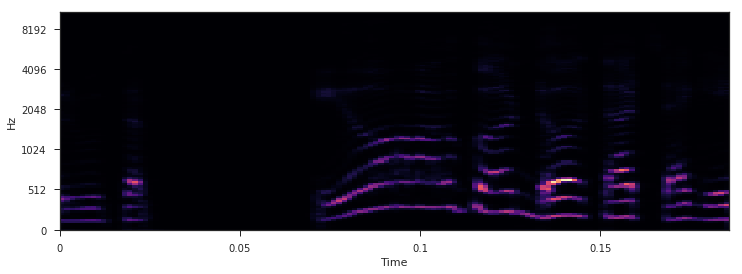

In [154]:
plt.figure(figsize=(12,4))

librosa.display.specshow(ps, sr=sr, hop_length=32, y_axis='mel', x_axis='time')

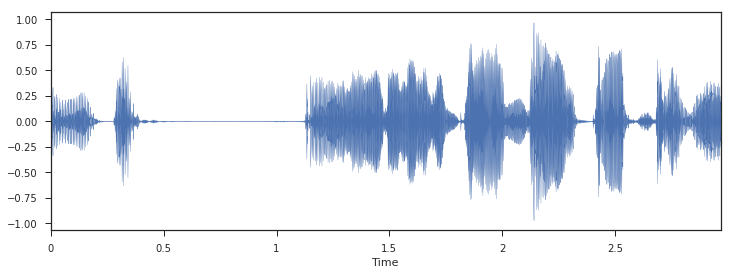

In [155]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(y, sr)

In [156]:
Audio(data = y, rate = sr)

In [157]:
print(y.shape, sr)

(65489,) 22050


In [160]:
# Női hangminta
y, sr = librosa.load('hangoskonyv/noimese/no003.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr, power=1.0)
ps.shape

(128, 128)

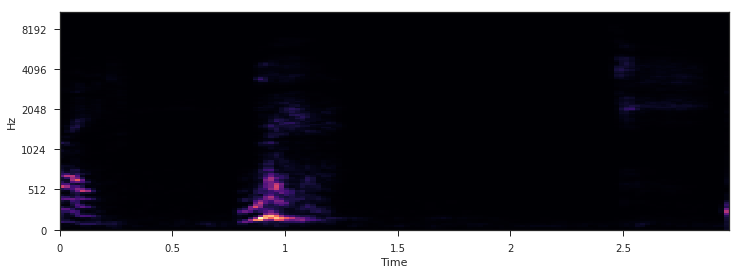

In [161]:
plt.figure(figsize=(12,4))
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

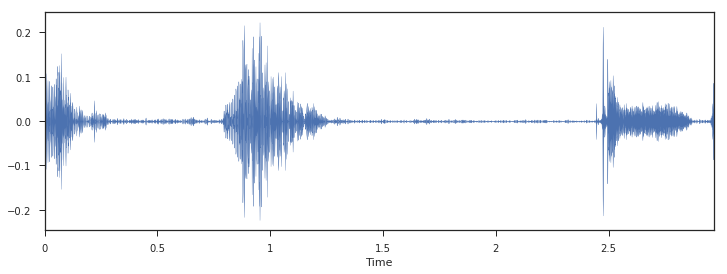

In [162]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(y, sr)

In [163]:
Audio(data = y, rate = sr)

Végig megyünk az összes valid dataframe adaton
és mindegyikből csinálunk egy (128,128) felbontású spectrogrammot
a librosa segítségével

Az ördög a részletekben van, úgyhogy mindíg ellenőrizzük le hogy milyen adatokkal dolgozunk

In [164]:
valid_data.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,be001.wav,100032,0,8,1,1,0,benedek
1,be002.wav,100263,0,8,1,1,0,benedek
2,be003.wav,100263,0,8,1,1,0,benedek
3,be004.wav,100263,0,8,1,1,0,benedek
4,be005.wav,100263,0,8,1,1,0,benedek


In [165]:
valid_data.size

1600

## Készítek egy új oszlopot (változót) ami a teljese elérési útvonalat tartalmazza 

In [166]:
valid_data['path'] = valid_data['class'].astype('str') + '/' + valid_data['slice_file_name'].astype('str')

In [167]:
valid_data['path']

0      benedek/be001.wav
1      benedek/be002.wav
2      benedek/be003.wav
3      benedek/be004.wav
4      benedek/be005.wav
5      benedek/be006.wav
6      benedek/be007.wav
7      benedek/be008.wav
8      benedek/be009.wav
9      benedek/be010.wav
10     benedek/be011.wav
11     benedek/be012.wav
12     benedek/be013.wav
13     benedek/be014.wav
14     benedek/be015.wav
15     benedek/be016.wav
16     benedek/be017.wav
17     benedek/be018.wav
18     benedek/be019.wav
19     benedek/be020.wav
20     benedek/be021.wav
21     benedek/be022.wav
22     benedek/be023.wav
23     benedek/be024.wav
24     benedek/be025.wav
25     benedek/be026.wav
26     benedek/be027.wav
27     benedek/be028.wav
28     benedek/be029.wav
29     benedek/be030.wav
             ...        
170    noimese/no071.wav
171    noimese/no072.wav
172    noimese/no073.wav
173    noimese/no074.wav
174    noimese/no075.wav
175    noimese/no076.wav
176    noimese/no077.wav
177    noimese/no078.wav
178    noimese/no079.wav


## Nézzük meg hogyan néz ki az adatszerkezetünk 

In [168]:
valid_data.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class,path
195,no096.wav,103076,0,8,1,10,1,noimese,noimese/no096.wav
196,no097.wav,103199,0,8,1,10,1,noimese,noimese/no097.wav
197,no098.wav,103199,0,8,1,10,1,noimese,noimese/no098.wav
198,no099.wav,103199,0,8,1,10,1,noimese,noimese/no099.wav
199,no100.wav,103199,0,8,1,10,1,noimese,noimese/no100.wav


## Készítsünk egy új táblázatot ami minden spectrogrammot és címkét tartalmaz 

In [169]:
row.path

'noimese/no001.wav'

In [170]:
D = [] # Dataset

i = 0

for row in valid_data.itertuples():
    y, sr = librosa.load('hangoskonyv/' + row.path, duration=2.97)
    # y = librosa.resample(y, sr, 8000)
    # i = i + 1
    # print(i)
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    D.append( (ps, row.classID) )


Ez a librosa spectrum őszintén szólva lassan halad

az y érték egyébként maga 'pixel' értéke



## Kukkantsunk bele az új adattömbe 

In [171]:
print("Number of samples: ", len(D))

Number of samples:  200


In [172]:
print(D[1])

(array([[  3.38356857e-03,   1.41562731e-02,   3.55589910e-02, ...,
          3.72453756e+00,   2.11551602e-01,   1.04511269e+00],
       [  4.57983119e-03,   3.64490553e-03,   1.42793158e-03, ...,
          2.54340711e-01,   3.31193024e-02,   8.81518791e-01],
       [  1.14293819e-02,   1.40351364e-02,   6.25736729e-03, ...,
          1.48948370e-01,   4.93395993e-02,   1.49430817e+00],
       ..., 
       [  6.36059718e-06,   1.94087442e-06,   9.38485948e-07, ...,
          1.11329971e-05,   2.43601281e-06,   5.48332745e-06],
       [  6.12270292e-06,   1.53488562e-06,   7.17409068e-09, ...,
          3.71031476e-07,   5.89450569e-09,   2.05519262e-07],
       [  5.95965186e-06,   1.49413320e-06,   9.33807543e-09, ...,
          5.73440246e-09,   4.38546414e-09,   2.84226657e-07]]), 0)


## Mivel az erdeti adataink erősen szekvenciálisak voltak (az első száz "A" a második száz "B" ezért keverjük össze  őket 

In [173]:
dataset = D
random.shuffle(dataset)


In [174]:
print(dataset[1])

(array([[  2.10095873e+00,   1.05219333e+00,   8.77054895e-01, ...,
          1.13191853e-02,   1.24421635e-02,   1.47383856e-01],
       [  5.00674902e+00,   1.27314055e+00,   4.10898619e-02, ...,
          1.91923571e-03,   1.60204754e-03,   1.68366019e-01],
       [  1.29940184e+01,   4.54154387e+00,   7.44637599e+00, ...,
          1.13533286e-03,   1.63001303e-03,   1.53355546e-01],
       ..., 
       [  1.25176712e-06,   1.39637186e-06,   8.92408400e-05, ...,
          6.23061274e-04,   4.73349937e-04,   3.13835161e-04],
       [  3.55538702e-07,   4.61718578e-07,   6.62002707e-05, ...,
          9.30047449e-08,   3.62749630e-08,   6.07194854e-05],
       [  3.71088386e-07,   4.25284789e-07,   4.14138453e-05, ...,
          5.34701112e-09,   1.07250614e-08,   5.24782994e-05]]), 0)


In [175]:
type(dataset)

list

In [176]:
dataset[6]

(array([[  2.84270702e-04,   1.01908030e-03,   1.79034599e-03, ...,
           2.42055036e-03,   2.15102098e-03,   5.82825977e-03],
        [  2.16910643e-03,   4.71369161e-03,   1.51819991e-02, ...,
           2.89847174e-03,   3.69422289e-03,   3.81084054e-03],
        [  1.59984051e-02,   2.05051546e-02,   4.48311992e-02, ...,
           2.96805713e-02,   1.60493954e-02,   1.28094053e-02],
        ..., 
        [  3.81565693e-07,   9.88920965e-08,   5.95780775e-09, ...,
           5.78975394e-09,   6.04221619e-09,   1.64712903e-08],
        [  3.72754024e-07,   9.72089387e-08,   6.36707607e-09, ...,
           4.28803046e-09,   2.94387219e-09,   8.72540971e-09],
        [  3.71833894e-07,   9.83416547e-08,   4.92064486e-09, ...,
           3.38385346e-09,   3.65291806e-09,   1.48047159e-08]]), 1)

In [177]:
for i in range(0,20):
    print(dataset[i][1], end=' ')

0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 

# Szétválasztom az adatokat

In [178]:

train = dataset[:150]
test = dataset[150:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)



In [179]:
type(train)

list

In [180]:
type(X_train)

tuple

In [181]:
X_train[1]

array([[  2.10095873e+00,   1.05219333e+00,   8.77054895e-01, ...,
          1.13191853e-02,   1.24421635e-02,   1.47383856e-01],
       [  5.00674902e+00,   1.27314055e+00,   4.10898619e-02, ...,
          1.91923571e-03,   1.60204754e-03,   1.68366019e-01],
       [  1.29940184e+01,   4.54154387e+00,   7.44637599e+00, ...,
          1.13533286e-03,   1.63001303e-03,   1.53355546e-01],
       ..., 
       [  1.25176712e-06,   1.39637186e-06,   8.92408400e-05, ...,
          6.23061274e-04,   4.73349937e-04,   3.13835161e-04],
       [  3.55538702e-07,   4.61718578e-07,   6.62002707e-05, ...,
          9.30047449e-08,   3.62749630e-08,   6.07194854e-05],
       [  3.71088386e-07,   4.25284789e-07,   4.14138453e-05, ...,
          5.34701112e-09,   1.07250614e-08,   5.24782994e-05]])

In [182]:
type(X_train[1])

numpy.ndarray

In [183]:
len(X_train[1])

128

In [184]:
type(y_train)

tuple

In [185]:
y_train[1]

0

In [186]:
type(y_train[1])

numpy.int64

In [187]:
# Keras ilyen tensor formában kéri az adatokat CNN bemenetén
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, 2))
y_test = np.array(keras.utils.to_categorical(y_test, 2))

In [188]:
type(X_train)

numpy.ndarray

In [189]:
type(y_train)

numpy.ndarray

In [190]:
X_train[1]

array([[[  2.10095873e+00],
        [  1.05219333e+00],
        [  8.77054895e-01],
        ..., 
        [  1.13191853e-02],
        [  1.24421635e-02],
        [  1.47383856e-01]],

       [[  5.00674902e+00],
        [  1.27314055e+00],
        [  4.10898619e-02],
        ..., 
        [  1.91923571e-03],
        [  1.60204754e-03],
        [  1.68366019e-01]],

       [[  1.29940184e+01],
        [  4.54154387e+00],
        [  7.44637599e+00],
        ..., 
        [  1.13533286e-03],
        [  1.63001303e-03],
        [  1.53355546e-01]],

       ..., 
       [[  1.25176712e-06],
        [  1.39637186e-06],
        [  8.92408400e-05],
        ..., 
        [  6.23061274e-04],
        [  4.73349937e-04],
        [  3.13835161e-04]],

       [[  3.55538702e-07],
        [  4.61718578e-07],
        [  6.62002707e-05],
        ..., 
        [  9.30047449e-08],
        [  3.62749630e-08],
        [  6.07194854e-05]],

       [[  3.71088386e-07],
        [  4.25284789e-07],
        [  

In [191]:
X_train.shape

(150, 128, 128, 1)

In [192]:
y_train.shape

(150, 2)

In [193]:
y_train[1]

array([ 1.,  0.], dtype=float32)

# Tensorboardot így kell bekötni

In [194]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='./tensorboard', histogram_freq=0,  
          write_graph=True, write_images=True)

In [195]:
# ha voltak korábbi adatok akkor azt kéretik törölni
!rm ./tensorboard/*

rm: cannot remove './tensorboard/*': No such file or directory


In [196]:
from IPython.display import Image
Image("images/keras.png")

# Keras (DNN)

In [197]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape)) # 124 x 124
model.add(MaxPooling2D((4, 2), strides=(4, 2))) #31 x 62
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid")) #31 x 62
model.add(MaxPooling2D((4, 2), strides=(4, 2))) #8 x 31
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid")) #8 x 31
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

In [198]:

epoch = 300

batch_size = 32


# Ide jó lenne betenni valamit az ADAM-ról és nagy kedvencemről a CrossEntropyrol is

In [199]:
Image("images/cuda.png")

In [200]:
model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'])

model.fit(
    x=X_train, 
    y=y_train,
    epochs=epoch,
    batch_size=batch_size,
    validation_data= (X_test, y_test),
    callbacks=[tbCallBack])



Train on 150 samples, validate on 50 samples
Epoch 1/300
150/150 [==============================] - 6s 39ms/step - loss: 4.4233 - acc: 0.5067 - val_loss: 3.4003 - val_acc: 0.5400
Epoch 2/300
150/150 [==============================] - 0s 998us/step - loss: 4.0146 - acc: 0.5133 - val_loss: 3.4970 - val_acc: 0.5400
Epoch 3/300
150/150 [==============================] - 0s 962us/step - loss: 3.1403 - acc: 0.6133 - val_loss: 1.0570 - val_acc: 0.9000
Epoch 4/300
150/150 [==============================] - 0s 927us/step - loss: 2.6381 - acc: 0.7267 - val_loss: 1.6936 - val_acc: 0.8400
Epoch 5/300
150/150 [==============================] - 0s 860us/step - loss: 2.2260 - acc: 0.7667 - val_loss: 0.9543 - val_acc: 0.9000
Epoch 6/300
150/150 [==============================] - 0s 813us/step - loss: 1.1357 - acc: 0.8333 - val_loss: 0.5168 - val_acc: 0.9600
Epoch 7/300
150/150 [==============================] - 0s 837us/step - loss: 1.2240 - acc: 0.8667 - val_loss: 0.5328 - val_acc: 0.9600
Epoch 8/300

Epoch 61/300
150/150 [==============================] - 0s 840us/step - loss: 0.0280 - acc: 0.9867 - val_loss: 0.4586 - val_acc: 0.9600
Epoch 62/300
150/150 [==============================] - 0s 850us/step - loss: 0.0217 - acc: 0.9867 - val_loss: 0.3962 - val_acc: 0.9600
Epoch 63/300
150/150 [==============================] - 0s 849us/step - loss: 0.0107 - acc: 0.9933 - val_loss: 0.3543 - val_acc: 0.9600
Epoch 64/300
150/150 [==============================] - 0s 884us/step - loss: 0.0434 - acc: 0.9933 - val_loss: 0.3504 - val_acc: 0.9600
Epoch 65/300
150/150 [==============================] - 0s 877us/step - loss: 0.0185 - acc: 0.9933 - val_loss: 0.3908 - val_acc: 0.9600
Epoch 66/300
150/150 [==============================] - 0s 857us/step - loss: 7.6013e-04 - acc: 1.0000 - val_loss: 0.4262 - val_acc: 0.9600
Epoch 67/300
150/150 [==============================] - 0s 823us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.4442 - val_acc: 0.9600
Epoch 68/300
150/150 [======================

Epoch 121/300
150/150 [==============================] - 0s 862us/step - loss: 0.0191 - acc: 0.9867 - val_loss: 0.5736 - val_acc: 0.9600
Epoch 122/300
150/150 [==============================] - 0s 886us/step - loss: 0.0671 - acc: 0.9867 - val_loss: 0.5716 - val_acc: 0.9600
Epoch 123/300
150/150 [==============================] - 0s 843us/step - loss: 0.0183 - acc: 0.9800 - val_loss: 0.4942 - val_acc: 0.9600
Epoch 124/300
150/150 [==============================] - 0s 861us/step - loss: 0.0083 - acc: 0.9933 - val_loss: 0.3791 - val_acc: 0.9600
Epoch 125/300
150/150 [==============================] - 0s 853us/step - loss: 0.0806 - acc: 0.9800 - val_loss: 0.3767 - val_acc: 0.9600
Epoch 126/300
150/150 [==============================] - 0s 815us/step - loss: 0.0228 - acc: 0.9933 - val_loss: 0.3091 - val_acc: 0.9600
Epoch 127/300
150/150 [==============================] - 0s 844us/step - loss: 0.0535 - acc: 0.9867 - val_loss: 0.3563 - val_acc: 0.9600
Epoch 128/300
150/150 [==================

150/150 [==============================] - 0s 887us/step - loss: 0.0195 - acc: 0.9933 - val_loss: 0.3390 - val_acc: 0.9600
Epoch 181/300
150/150 [==============================] - 0s 857us/step - loss: 6.8169e-05 - acc: 1.0000 - val_loss: 0.3826 - val_acc: 0.9600
Epoch 182/300
150/150 [==============================] - 0s 824us/step - loss: 4.3928e-04 - acc: 1.0000 - val_loss: 0.4119 - val_acc: 0.9600
Epoch 183/300
150/150 [==============================] - 0s 833us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4279 - val_acc: 0.9600
Epoch 184/300
150/150 [==============================] - 0s 901us/step - loss: 0.0054 - acc: 0.9933 - val_loss: 0.4263 - val_acc: 0.9600
Epoch 185/300
150/150 [==============================] - 0s 938us/step - loss: 4.1540e-04 - acc: 1.0000 - val_loss: 0.4126 - val_acc: 0.9600
Epoch 186/300
150/150 [==============================] - 0s 854us/step - loss: 1.3333e-04 - acc: 1.0000 - val_loss: 0.3888 - val_acc: 0.9600
Epoch 187/300
150/150 [================

150/150 [==============================] - 0s 872us/step - loss: 1.2704e-04 - acc: 1.0000 - val_loss: 0.3790 - val_acc: 0.9600
Epoch 239/300
150/150 [==============================] - 0s 865us/step - loss: 1.3441e-05 - acc: 1.0000 - val_loss: 0.3813 - val_acc: 0.9600
Epoch 240/300
150/150 [==============================] - 0s 828us/step - loss: 2.4045e-04 - acc: 1.0000 - val_loss: 0.3810 - val_acc: 0.9600
Epoch 241/300
150/150 [==============================] - 0s 844us/step - loss: 7.3644e-05 - acc: 1.0000 - val_loss: 0.3801 - val_acc: 0.9600
Epoch 242/300
150/150 [==============================] - 0s 840us/step - loss: 8.8878e-04 - acc: 1.0000 - val_loss: 0.3813 - val_acc: 0.9600
Epoch 243/300
150/150 [==============================] - 0s 830us/step - loss: 0.0435 - acc: 0.9933 - val_loss: 0.5513 - val_acc: 0.9600
Epoch 244/300
150/150 [==============================] - 0s 845us/step - loss: 0.0285 - acc: 0.9867 - val_loss: 0.6307 - val_acc: 0.9600
Epoch 245/300
150/150 [============

150/150 [==============================] - 0s 880us/step - loss: 0.0075 - acc: 0.9933 - val_loss: 0.3457 - val_acc: 0.9600
Epoch 298/300
150/150 [==============================] - 0s 862us/step - loss: 1.8973e-04 - acc: 1.0000 - val_loss: 0.3231 - val_acc: 0.9600
Epoch 299/300
150/150 [==============================] - 0s 858us/step - loss: 6.4965e-04 - acc: 1.0000 - val_loss: 0.3157 - val_acc: 0.9600
Epoch 300/300
150/150 [==============================] - 0s 857us/step - loss: 2.8327e-05 - acc: 1.0000 - val_loss: 0.3129 - val_acc: 0.9800


# Evaluate

In [66]:
score = model.evaluate(
    x=X_test,
    y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

50/50 [==============================] - 0s 503us/step
Test loss: 0.3962799420580268
Test accuracy: 0.94


# Elmentem a súlyokat

In [67]:
Wsave = model.get_weights()

In [68]:
type(Wsave)

list

ha újra be szeretném állítani őket akkor

In [69]:
# model.set_weights(Wsave)

# Tensorboard

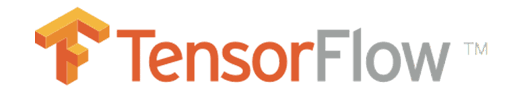

In [70]:
Image("images/tensorflow.png")

tensorboard --logdir tensorboard

In [69]:
# http://193.224.59.115:6006

# Hogy lehet elkapni a Keras model paramétereit

In [71]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_built',
 '_check_num_samples',
 '_check_trainable_weights_consistency',
 '_container_nodes',
 '_feed_input_names',
 '_feed_inputs',
 '_fit_loop',
 '_flattened_layers',
 '_gather_list_attr',
 '_get_node_attribute_at_index',
 '_inbound_nodes',
 '_initial_weights',
 '_make_predict_function',
 '_make_test_function',
 '_make_train_function',
 '_node_key',
 '_nodes_by_depth',
 '_outbound_nodes',
 '_output_mask_cache',
 '_output_shape_cache',
 '_output_tensor_cache',
 '_predict_loop',
 '_standardize_user_data',
 '_test_loop',
 '_trainable',
 '_updated_config',
 'add',
 'add_loss',
 'add_updat

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 24)      624       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 62, 24)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 31, 62, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 58, 48)        28848     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 29, 48)         0         
_________________________________________________________________
activation_2 (Activation)    (None, 6, 29, 48)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 25, 48)         57648     
__________

In [73]:
type(D)

list

In [43]:
D[1]

(array([[  3.32283165e-04,   4.49817112e-04,   1.13793069e-03, ...,
           2.31170035e-03,   1.67012143e-03,   2.00563144e-01],
        [  1.13543316e-03,   1.91327549e-03,   3.33268768e-03, ...,
           1.09917378e-02,   8.84846814e-03,   2.37514876e-01],
        [  4.92239488e-03,   9.45204807e-03,   1.26961784e-02, ...,
           1.29798637e-02,   2.69097453e-02,   3.33965071e-01],
        ..., 
        [  2.26807706e-08,   6.86548783e-09,   1.98560527e-09, ...,
           2.08988802e-09,   6.20057403e-09,   4.37990807e-05],
        [  2.73280838e-08,   7.12001901e-09,   5.83982780e-10, ...,
           5.82857801e-10,   6.72996673e-09,   6.69685747e-05],
        [  2.77474098e-08,   6.96016804e-09,   3.15601678e-11, ...,
           3.70261013e-11,   7.49151826e-09,   8.23386843e-05]]), 1)